Correlation between Stock Prices and Interest Rates: (np.float64(-0.06899598156974975), np.float64(0.28808758841004767))
Correlation between Stock Prices and Inflation Rates: (np.float64(-0.20670997569903993), np.float64(0.001310437507154485))


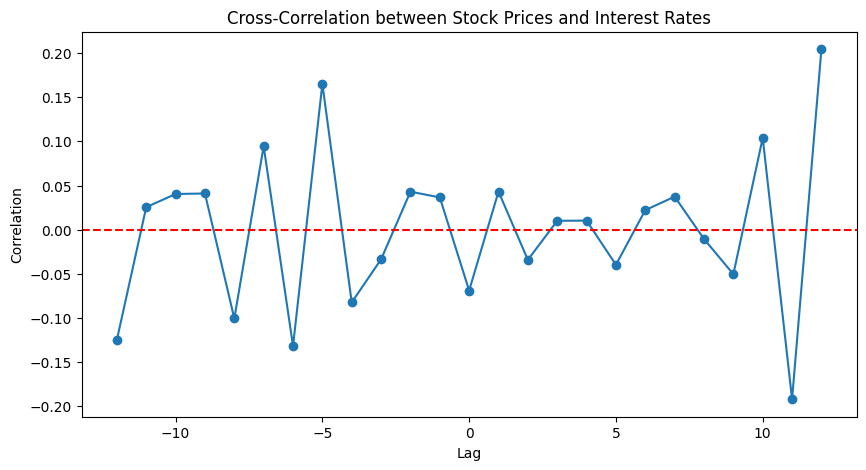

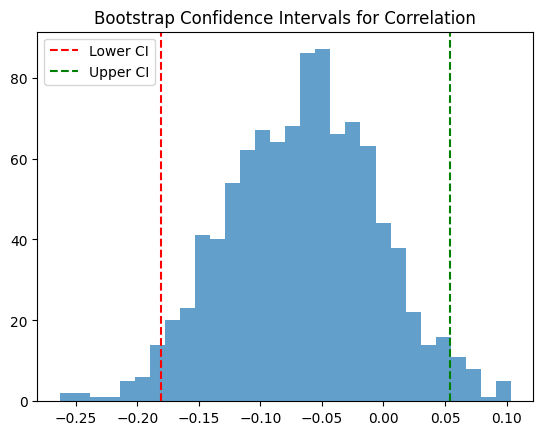

95% Confidence Interval for Correlation: [-0.18076122  0.05417153]


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Step 1: Load the dataset (manually load or simulate sample data here)
# Replace these with actual data loading mechanisms
def load_data():
    dates = np.arange('2000-01', '2020-01', dtype='datetime64[M]')
    stock_prices = np.random.normal(100, 10, len(dates))
    interest_rates = np.random.normal(2, 0.5, len(dates))
    inflation_rates = np.random.normal(1.5, 0.3, len(dates))
    return dates, stock_prices, interest_rates, inflation_rates

dates, stock_prices, interest_rates, inflation_rates = load_data()

# Step 2: Stationarity Check (using simple differencing)
def difference(series):
    return series[1:] - series[:-1]

stock_prices_diff = difference(stock_prices)
interest_rates_diff = difference(interest_rates)
inflation_rates_diff = difference(inflation_rates)

# Step 3: Correlation Analysis
def calculate_pearson(series1, series2):
    r, p_value = st.pearsonr(series1, series2)
    return r, p_value

correlation_stock_interest = calculate_pearson(stock_prices_diff, interest_rates_diff)
correlation_stock_inflation = calculate_pearson(stock_prices_diff, inflation_rates_diff)

print(f"Correlation between Stock Prices and Interest Rates: {correlation_stock_interest}")
print(f"Correlation between Stock Prices and Inflation Rates: {correlation_stock_inflation}")

# Step 4: Cross-Correlation for Lag Analysis
def cross_correlation(series1, series2, lag):
    if lag > 0:
        series1 = series1[lag:]
        series2 = series2[:-lag]
    elif lag < 0:
        series1 = series1[:lag]
        series2 = series2[-lag:]
    return np.corrcoef(series1, series2)[0, 1]

lags = range(-12, 13)  # Lags from -12 to +12 months
cross_corrs = [cross_correlation(stock_prices_diff, interest_rates_diff, lag) for lag in lags]

# Plot Cross-Correlation
plt.figure(figsize=(10, 5))
plt.plot(lags, cross_corrs, marker="o")
plt.axhline(0, color="red", linestyle="--")
plt.title("Cross-Correlation between Stock Prices and Interest Rates")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

# Step 5: Bootstrap for Confidence Intervals
def bootstrap_correlation(series1, series2, num_samples=1000):
    n = len(series1)
    bootstrapped_corrs = []
    for _ in range(num_samples):
        indices = np.random.choice(n, n, replace=True)
        sample1 = series1[indices]
        sample2 = series2[indices]
        corr, _ = calculate_pearson(sample1, sample2)
        bootstrapped_corrs.append(corr)
    return np.percentile(bootstrapped_corrs, [2.5, 97.5]), bootstrapped_corrs

conf_interval, bootstrap_corrs = bootstrap_correlation(stock_prices_diff, interest_rates_diff)

# Plot Bootstrap Confidence Intervals
plt.hist(bootstrap_corrs, bins=30, alpha=0.7)
plt.axvline(conf_interval[0], color='red', linestyle='--', label="Lower CI")
plt.axvline(conf_interval[1], color='green', linestyle='--', label="Upper CI")
plt.title("Bootstrap Confidence Intervals for Correlation")
plt.legend()
plt.show()

print(f"95% Confidence Interval for Correlation: {conf_interval}")

